# Data processing

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
import os

print("library imported succesfully")


library imported succesfully


In [42]:
sz = 128

# Initialising our first Convolution network model 

In [66]:
classifier = Sequential() 

In [67]:
# First convolution network and pooling


# First convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))
#classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
#classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
classifier.add(Flatten())


# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=27, activation='softmax')) # softmax for more than 2

# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2



In [68]:
classifier.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 28800)             0         
                                                                 
 dense_12 (Dense)            (None, 128)              

In [69]:
from keras.preprocessing.image import ImageDataGenerator


In [5]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

sz=128


test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('ProcessedData128/train',
                                                 target_size=(sz, sz),
                                                 batch_size=24,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('ProcessedData128/test',
                                            target_size=(sz , sz),
                                            batch_size=27,
                                            color_mode='grayscale',
                                            class_mode='categorical') 


Found 648 images belonging to 27 classes.
Found 162 images belonging to 27 classes.


In [72]:
classifier.fit(
        training_set,
        epochs=20,
        verbose=1, 
        validation_data=test_set,
)# No of images in test set

Epoch 1/20
27/27 [==============================] - 13s 318ms/step - loss: 3.4434 - accuracy: 0.0293 - val_loss: 3.2938 - val_accuracy: 0.0494
Epoch 2/20
27/27 [==============================] - 6s 211ms/step - loss: 3.2843 - accuracy: 0.0509 - val_loss: 3.2303 - val_accuracy: 0.1790
Epoch 3/20
27/27 [==============================] - 6s 210ms/step - loss: 3.1526 - accuracy: 0.0910 - val_loss: 2.6652 - val_accuracy: 0.4198
Epoch 4/20
27/27 [==============================] - 6s 199ms/step - loss: 2.6319 - accuracy: 0.2315 - val_loss: 1.6345 - val_accuracy: 0.6173
Epoch 5/20
27/27 [==============================] - 6s 228ms/step - loss: 1.9500 - accuracy: 0.4228 - val_loss: 0.8719 - val_accuracy: 0.8457
Epoch 6/20
27/27 [==============================] - 6s 213ms/step - loss: 1.4577 - accuracy: 0.5540 - val_loss: 0.4452 - val_accuracy: 0.9074
Epoch 7/20
27/27 [==============================] - 6s 211ms/step - loss: 1.2004 - accuracy: 0.6497 - val_loss: 0.3799 - val_accuracy: 0.8827
Epoch

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

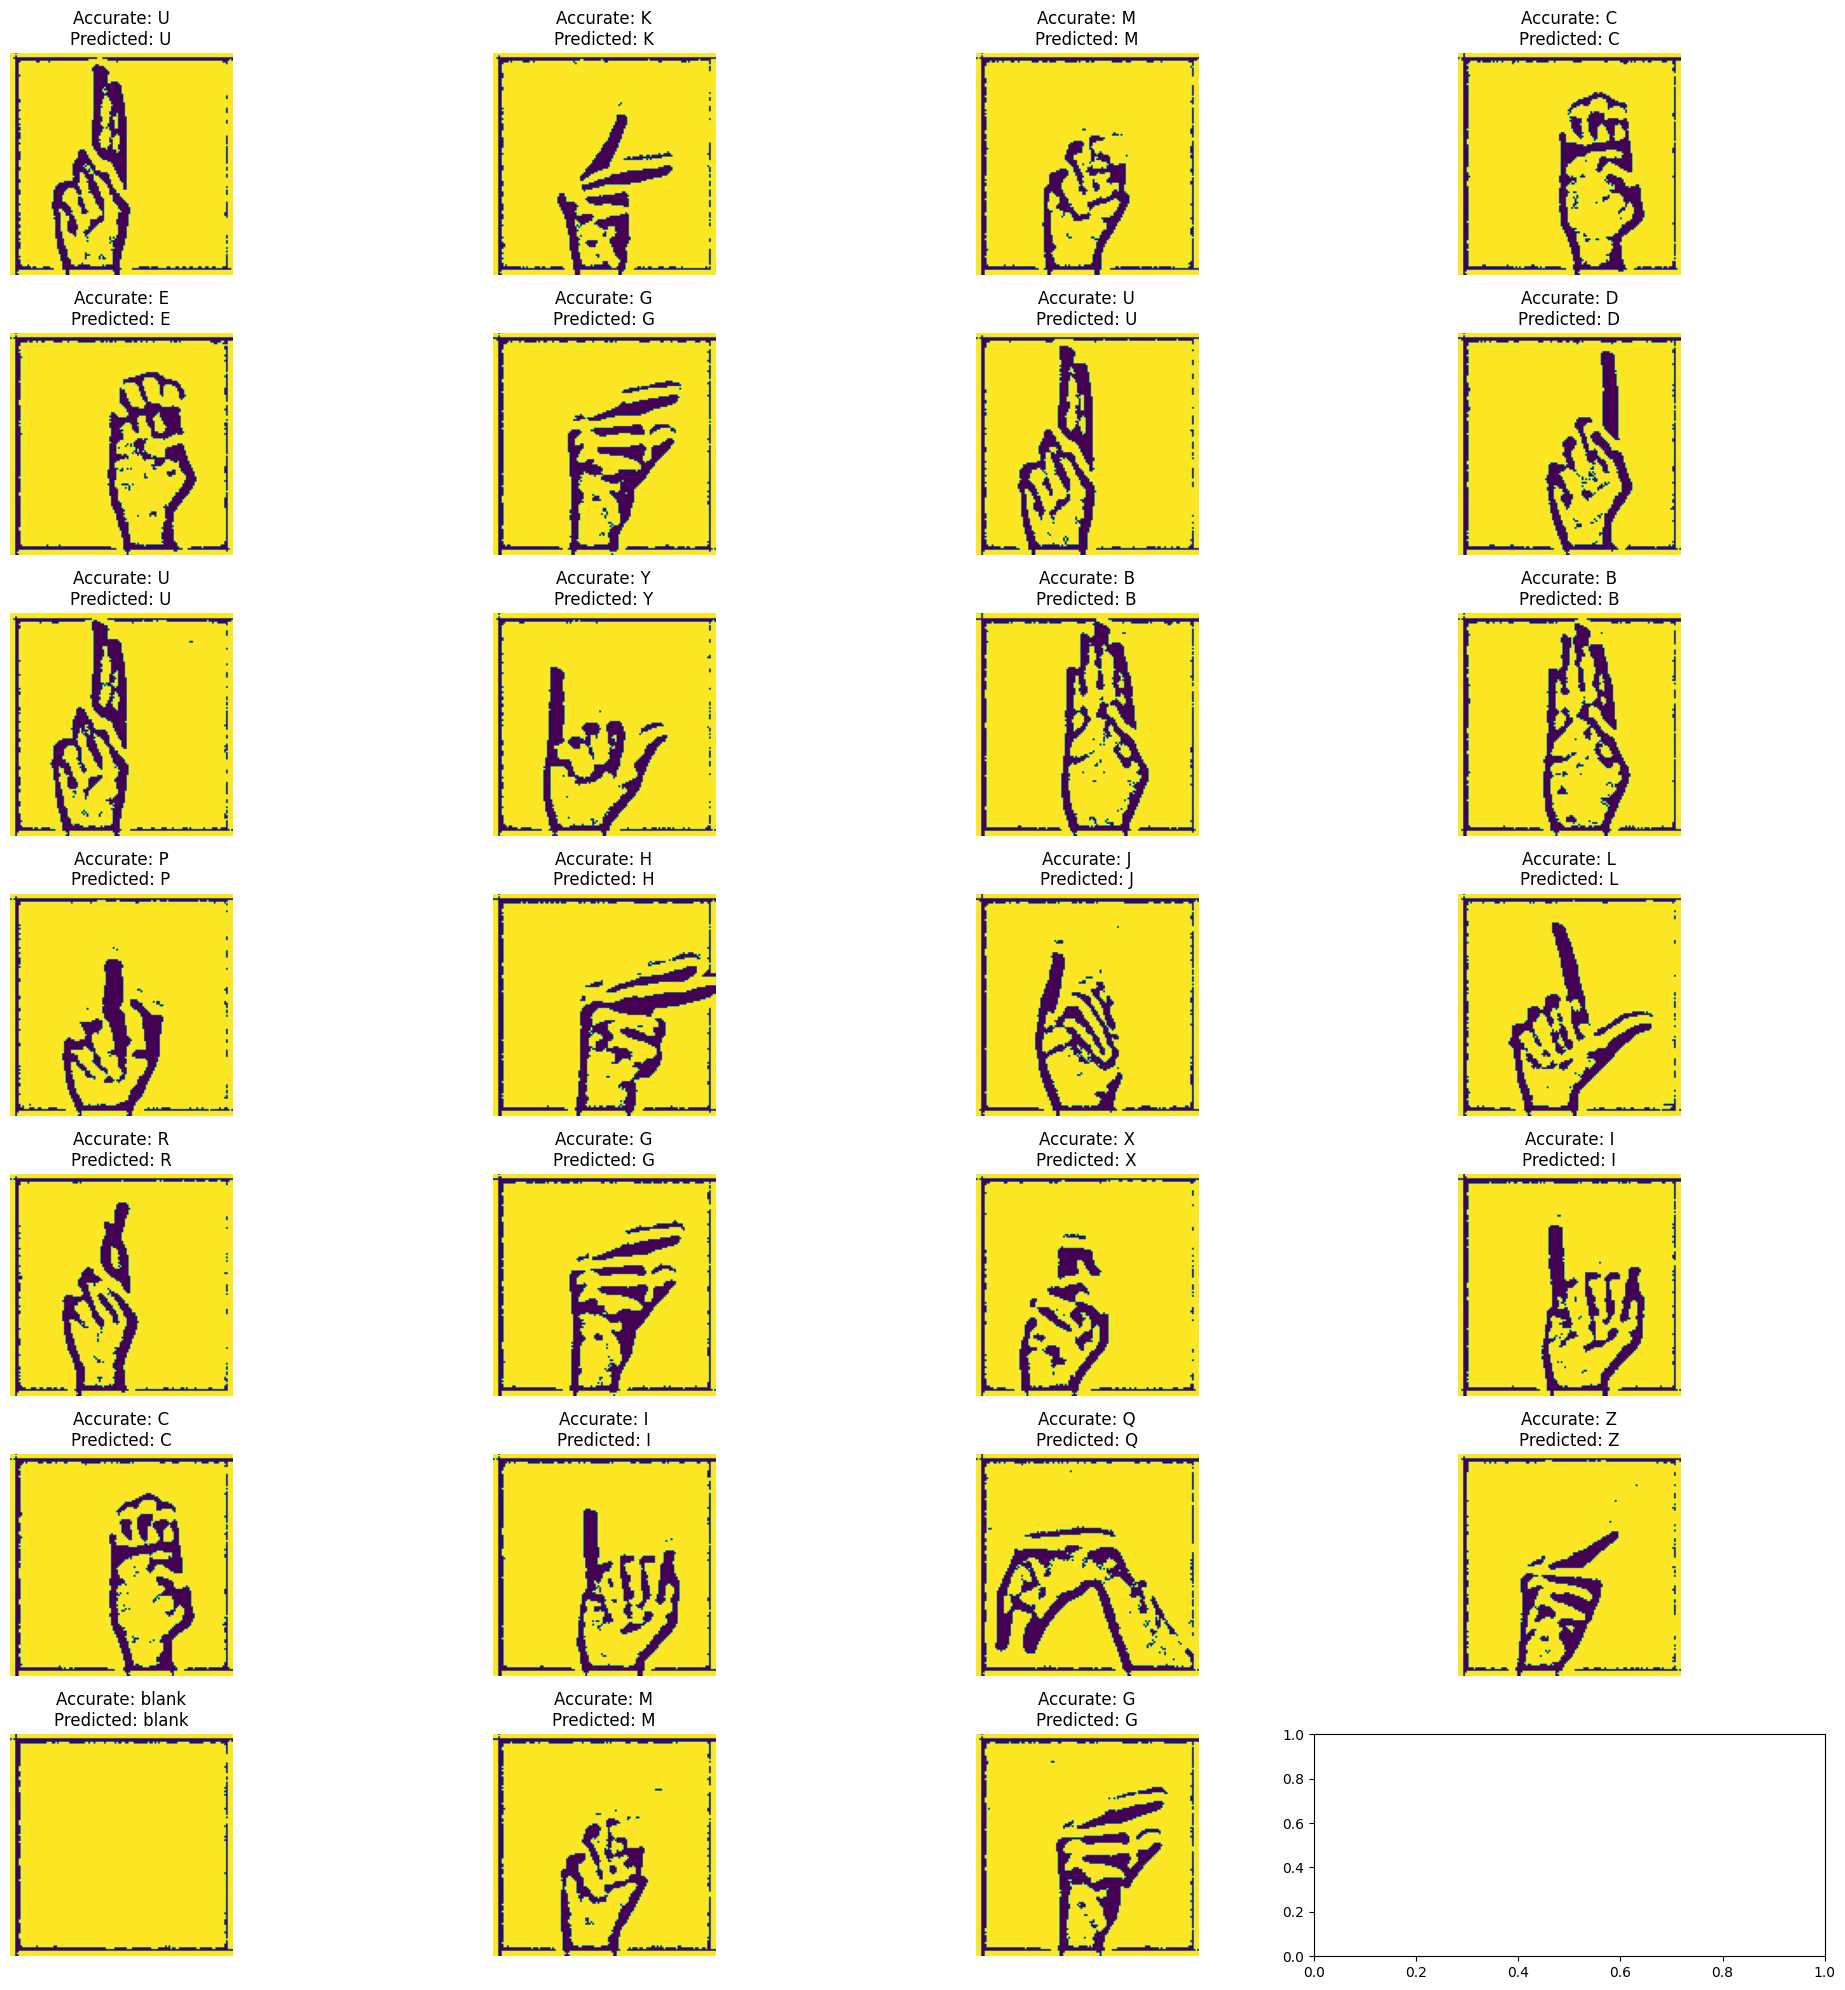

In [82]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator


imgs,labels = test_set.next()
print(labels)
classifier.evaluate(imgs,labels,verbose=1)
predictions = classifier.predict(imgs, verbose=0)
print(len(predictions))

word_dict = list(training_set.class_indices)
# plotImages(imgs)
print('Actual labels')
for i in labels:
    print(word_dict[np.argmax(i)], end='   ')


print('Actual labels')
accurate_labels = []
for i in labels:
    print(word_dict[np.argmax(i)], end='   ') 
    val = word_dict[np.argmax(i)] 
    accurate_labels.append(val) 


print()
predicted_labels=[]
print('predicted labels')
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end='   ')
    val1 = word_dict[np.argmax(i)] 
    predicted_labels.append(val1)

print() 
plotImages(imgs,accurate_labels,predicted_labels)




In [11]:
path = 'E:/MachineLearning/SignDetectionSystemUsingMachineLearning/models/SignDetection.h5' 
classifier.save(path)

# Loading saved model

In [46]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

sz=128


test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('ProcessedData128/train',
                                                 target_size=(sz, sz),
                                                 batch_size=24,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('ProcessedData128/test',
                                            target_size=(sz , sz),
                                            batch_size=27,
                                            color_mode='grayscale',
                                            class_mode='categorical') 


Found 648 images belonging to 27 classes.
Found 162 images belonging to 27 classes.


In [21]:
from tensorflow.keras.models import load_model
path = 'E:/MachineLearning/SignDetectionSystemUsingMachineLearning/best_model_dataflair3.h5' 


savedModel=load_model(path)

In [22]:
savedModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [60]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator


test_path = 'ProcessedData128/test' 
train_path = 'ProcessedData128/train'


train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(128,128),color_mode='grayscale', class_mode='categorical', batch_size=27,shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(128,128),color_mode='grayscale', class_mode='categorical', batch_size=27, shuffle=True)

Found 648 images belonging to 27 classes.
Found 162 images belonging to 27 classes.


In [25]:
savedModel.evaluate(test_batches)

6/6 [==============================] - 2s 128ms/step - loss: 0.2320 - accuracy: 0.9630


[0.23195898532867432, 0.9629629850387573]

# Let us predict our output and visualise it

In [53]:
import numpy as np

imgs, labels = next(train_batches)
train_labels = list(train_batches.class_indices)

# the labels is giving me the acccurate position of the image from 24 
print(len(labels))
position = np.argmax(labels[1])
print(position+1)
print(train_labels[position])

IndexError: index 1 is out of bounds for axis 2 with size 1

In [77]:
#Plotting the images...
import warnings
import numpy as np
import cv2
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt # for showing images

warnings.simplefilter(action='ignore', category=FutureWarning)
plt.figure(figsize=(40, 40))

def plotImages(images_arr, accurate_labels, predicted_labels):
    num_images = len(images_arr)
    num_complete_rows = num_images // 4
    num_remaining_images = num_images % 4
    
    fig, axes = plt.subplots(num_complete_rows + 1, 4, figsize=(20, 20))
    
    # Plot complete rows
    for i in range(num_complete_rows):
        for j in range(4):
            idx = i * 4 + j
            ax = axes[i, j]
            ax.imshow(images_arr[idx])
            ax.set_title(f'Accurate: {accurate_labels[idx]}\nPredicted: {predicted_labels[idx]}')
            ax.axis('off')
    
    # Plot remaining images
    for k in range(num_remaining_images):
        idx = num_complete_rows * 4 + k
        ax = axes[num_complete_rows, k]
        ax.imshow(images_arr[idx])
        ax.set_title(f'Accurate: {accurate_labels[idx]}\nPredicted: {predicted_labels[idx]}')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()





# plotImages(imgs)
# print(imgs.shape)
# print(labels)

<Figure size 4000x4000 with 0 Axes>

In [28]:
classifier.fit(
        train_batches,
        epochs=20,
        verbose=1, 
        validation_data=test_batches,
)# No of images in test set

Epoch 1/20

24/24 [==============================] - 18s 615ms/step - loss: 53.9285 - accuracy: 0.0910 - val_loss: 3.0124 - val_accuracy: 0.2716
Epoch 2/20
24/24 [==============================] - 4s 181ms/step - loss: 2.7434 - accuracy: 0.2099 - val_loss: 1.8601 - val_accuracy: 0.5802
Epoch 3/20
24/24 [==============================] - 4s 185ms/step - loss: 2.1044 - accuracy: 0.3812 - val_loss: 1.1226 - val_accuracy: 0.8210
Epoch 4/20
24/24 [==============================] - 4s 181ms/step - loss: 1.6423 - accuracy: 0.5154 - val_loss: 0.8132 - val_accuracy: 0.8519
Epoch 5/20
24/24 [==============================] - 4s 186ms/step - loss: 1.2957 - accuracy: 0.6173 - val_loss: 0.7209 - val_accuracy: 0.8704
Epoch 6/20
24/24 [==============================] - 4s 184ms/step - loss: 1.1009 - accuracy: 0.6806 - val_loss: 0.5530 - val_accuracy: 0.9012
Epoch 7/20
24/24 [==============================] - 5s 202ms/step - loss: 0.9543 - accuracy: 0.7269 - val_loss: 0.4329 - val_accuracy: 0.9074
Epo

In [5]:
imgs, labels = next(test_batches)

In [30]:
scores = savedModel.evaluate(test_batches, verbose=0)

In [31]:
scores

[0.23195898532867432, 0.9629629850387573]

In [79]:
classifier.save('best_model_dataflair13.h5')

In [33]:
predictions = savedModel.predict(imgs, verbose=0)
print(len(predictions))

27


In [80]:

word_dict = list(training_set.class_indices)
# plotImages(imgs)
print('Actual labels')
for i in labels:
    print(word_dict[np.argmax(i)], end='   ')

Actual labels
G   J   H   A   V   D   B   A   T   B   X   Q   F   F   blank   U   L   R   Q   Q   M   C   S   U   T   L   Y   

Actual labels
T   H   D   R   I   Z   T   A   E   V   blank   R   blank   L   Y   L   U   G   K   B   L   blank   S   E   Q   blank   J   
predicted labels
T   A   D   R   I   Z   T   A   E   V   blank   R   blank   L   Y   L   U   G   K   B   L   blank   S   E   Q   blank   J   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

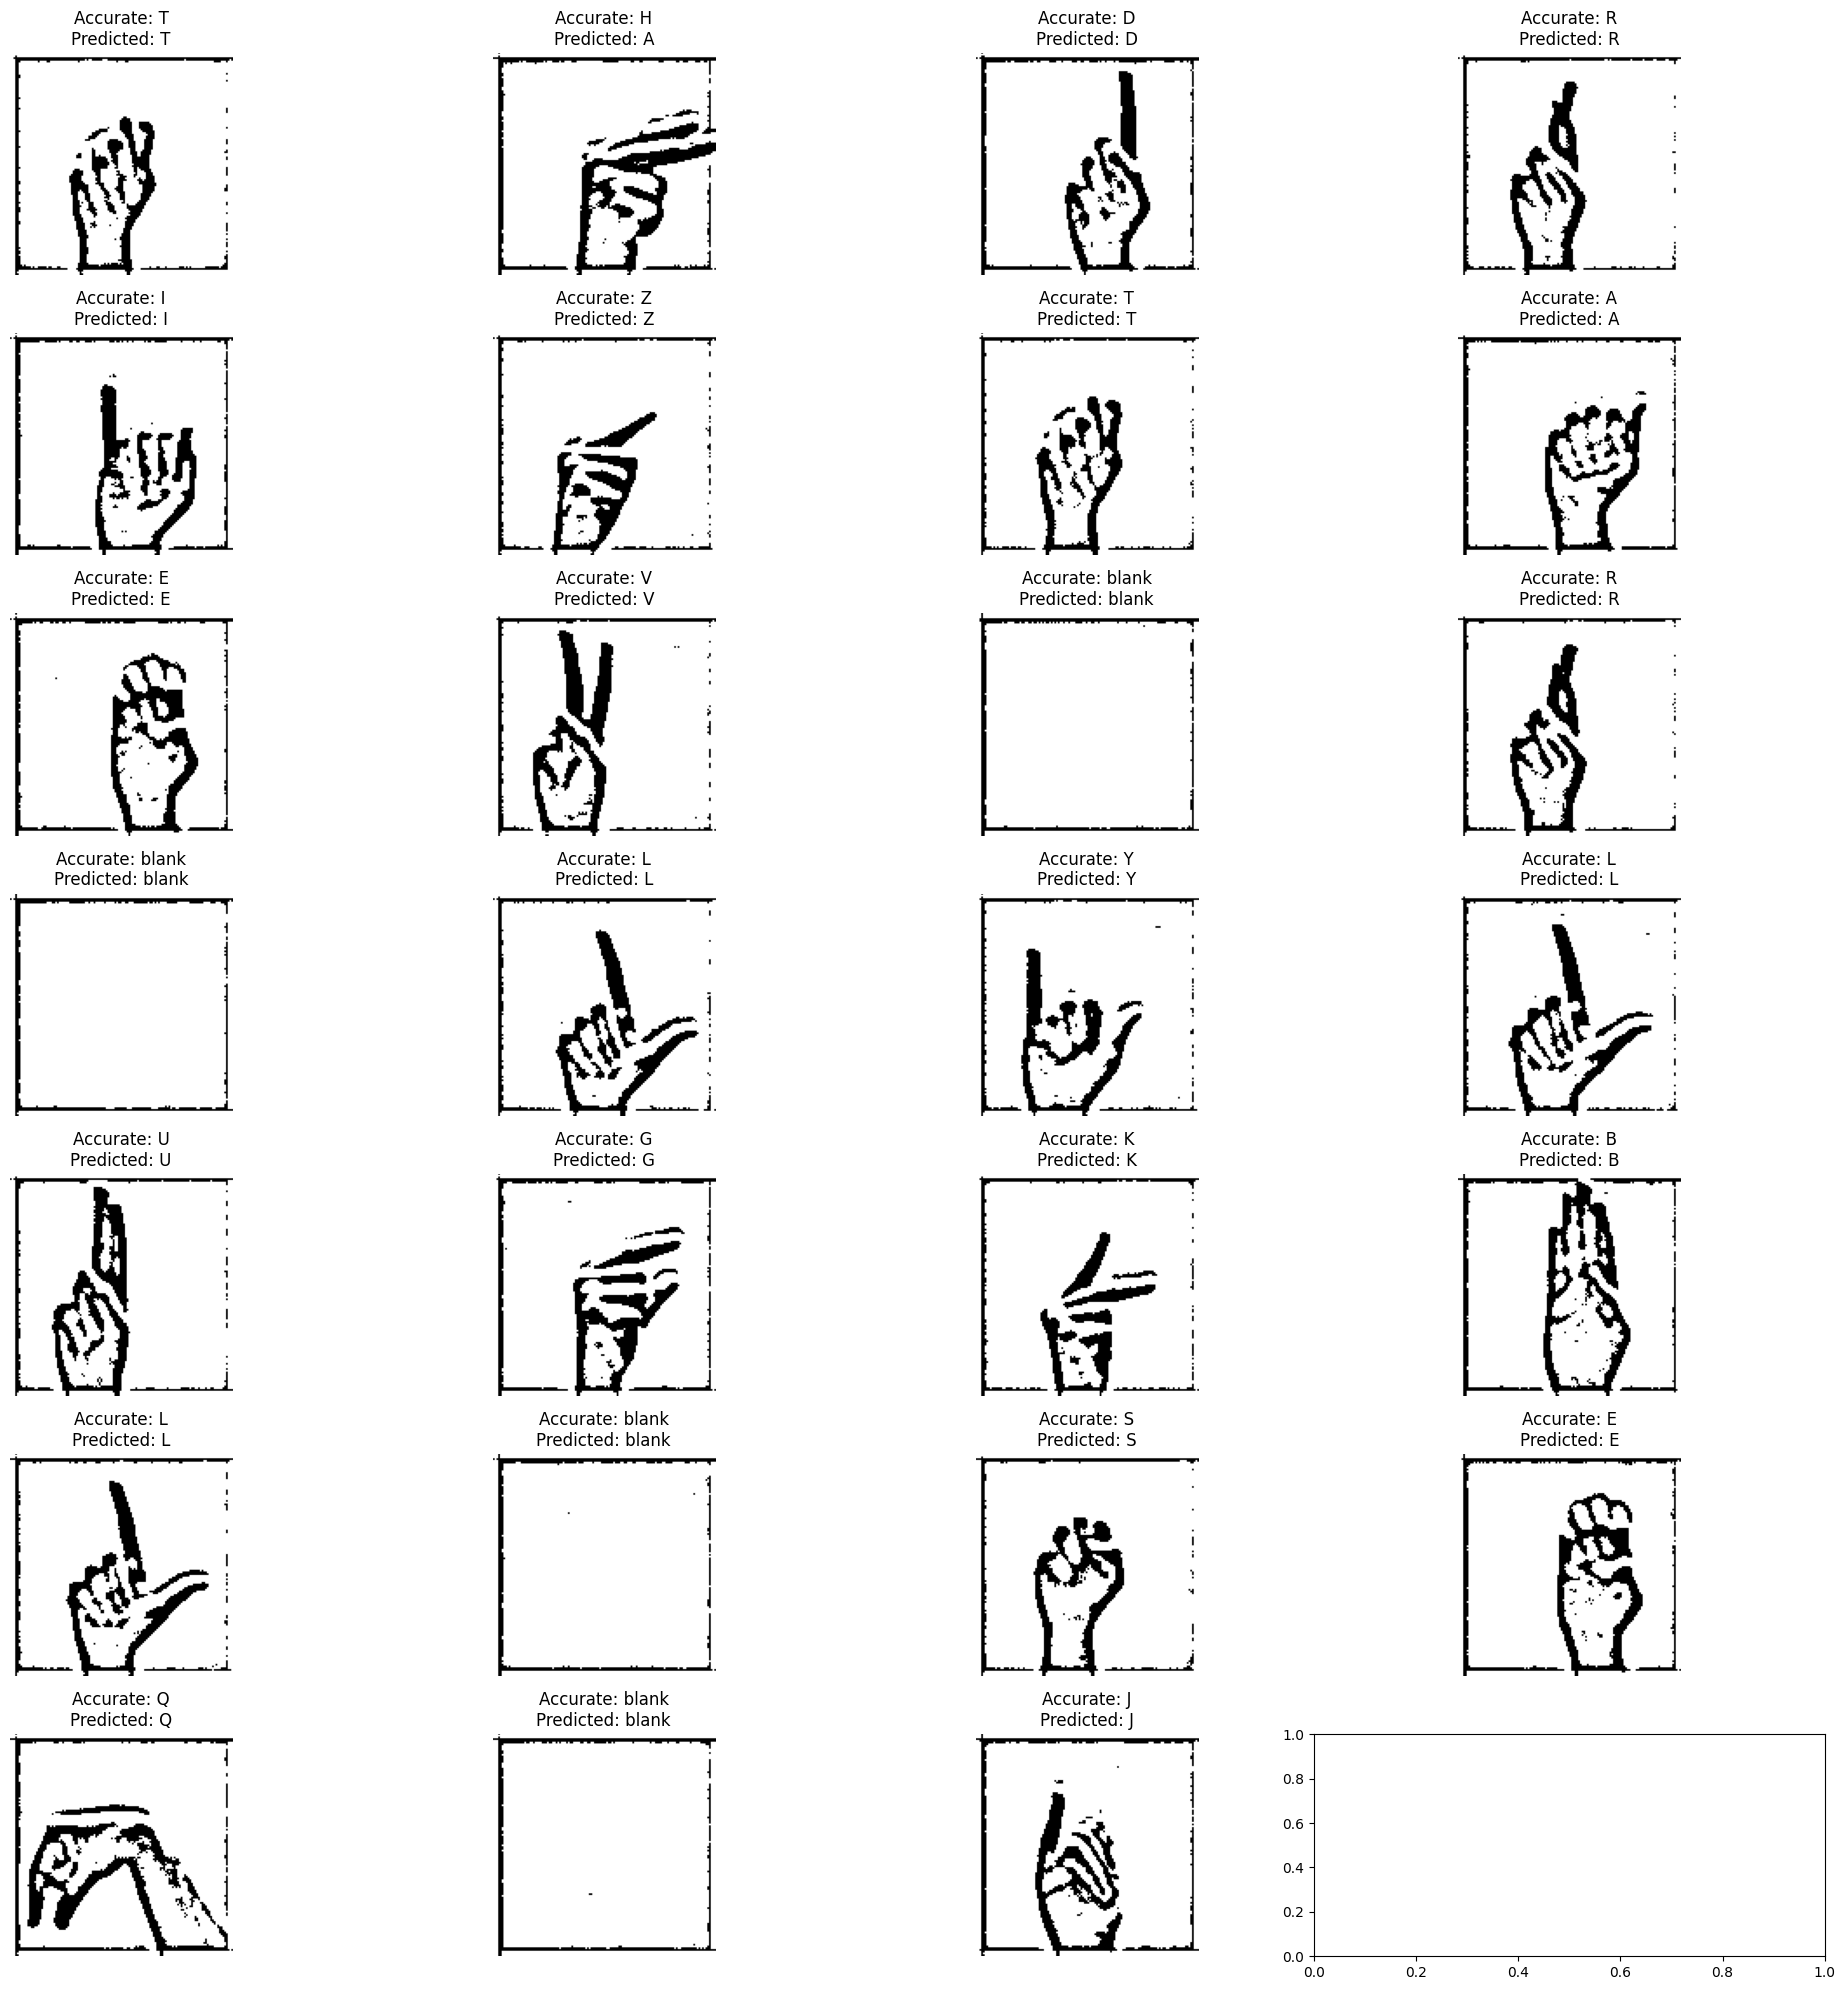

In [35]:
print('Actual labels')
accurate_labels = []
for i in labels:
    print(word_dict[np.argmax(i)], end='   ') 
    val = word_dict[np.argmax(i)] 
    accurate_labels.append(val) 


print()
predicted_labels=[]
print('predicted labels')
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end='   ')
    val1 = word_dict[np.argmax(i)] 
    predicted_labels.append(val1)

print() 
plotImages(imgs,accurate_labels,predicted_labels)



https://www.bing.com/images/search?view=detailV2&ccid=FlofrkqO&id=DE4B6131A0DD1D2567E5CFC56399762CD76E68C0&thid=OIP.FlofrkqOZkAhVPo_3hR0BgAAAA&mediaurl=https%3a%2f%2fi.pinimg.com%2foriginals%2f94%2f3f%2f07%2f943f0756b6c97710359be270e1432ac9.jpg&exph=710&expw=474&q=sign+language+image&simid=608001678586611371&FORM=IRPRST&ck=E1E438F170C0CCAB35CEF2391D0A4C50&selectedIndex=15&itb=0&ajaxhist=0&ajaxserp=0

In [87]:
classifier.save('best_model_dataflair13.h5')

In [2]:
from tensorflow.keras.models import load_model
path = 'E:/MachineLearning/SignDetectionSystemUsingMachineLearning/best_model_dataflair13.h5' 


savedModel=load_model(path)

In [6]:
savedModel.evaluate(imgs,labels,verbose=0)

[0.39246490597724915, 0.9259259104728699]

In [7]:
predictions = savedModel.predict(imgs, verbose=0)
print(len(predictions))

27


Actual labels
P   C   L   J   F   L   K   Y   T   H   W   W   W   blank   S   E   R   J   A   B   O   K   P   D   Q   L   Z   
predicted labels
P   C   L   J   F   L   K   W   T   M   W   W   W   blank   S   E   R   J   A   B   O   K   P   D   Q   L   Z   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

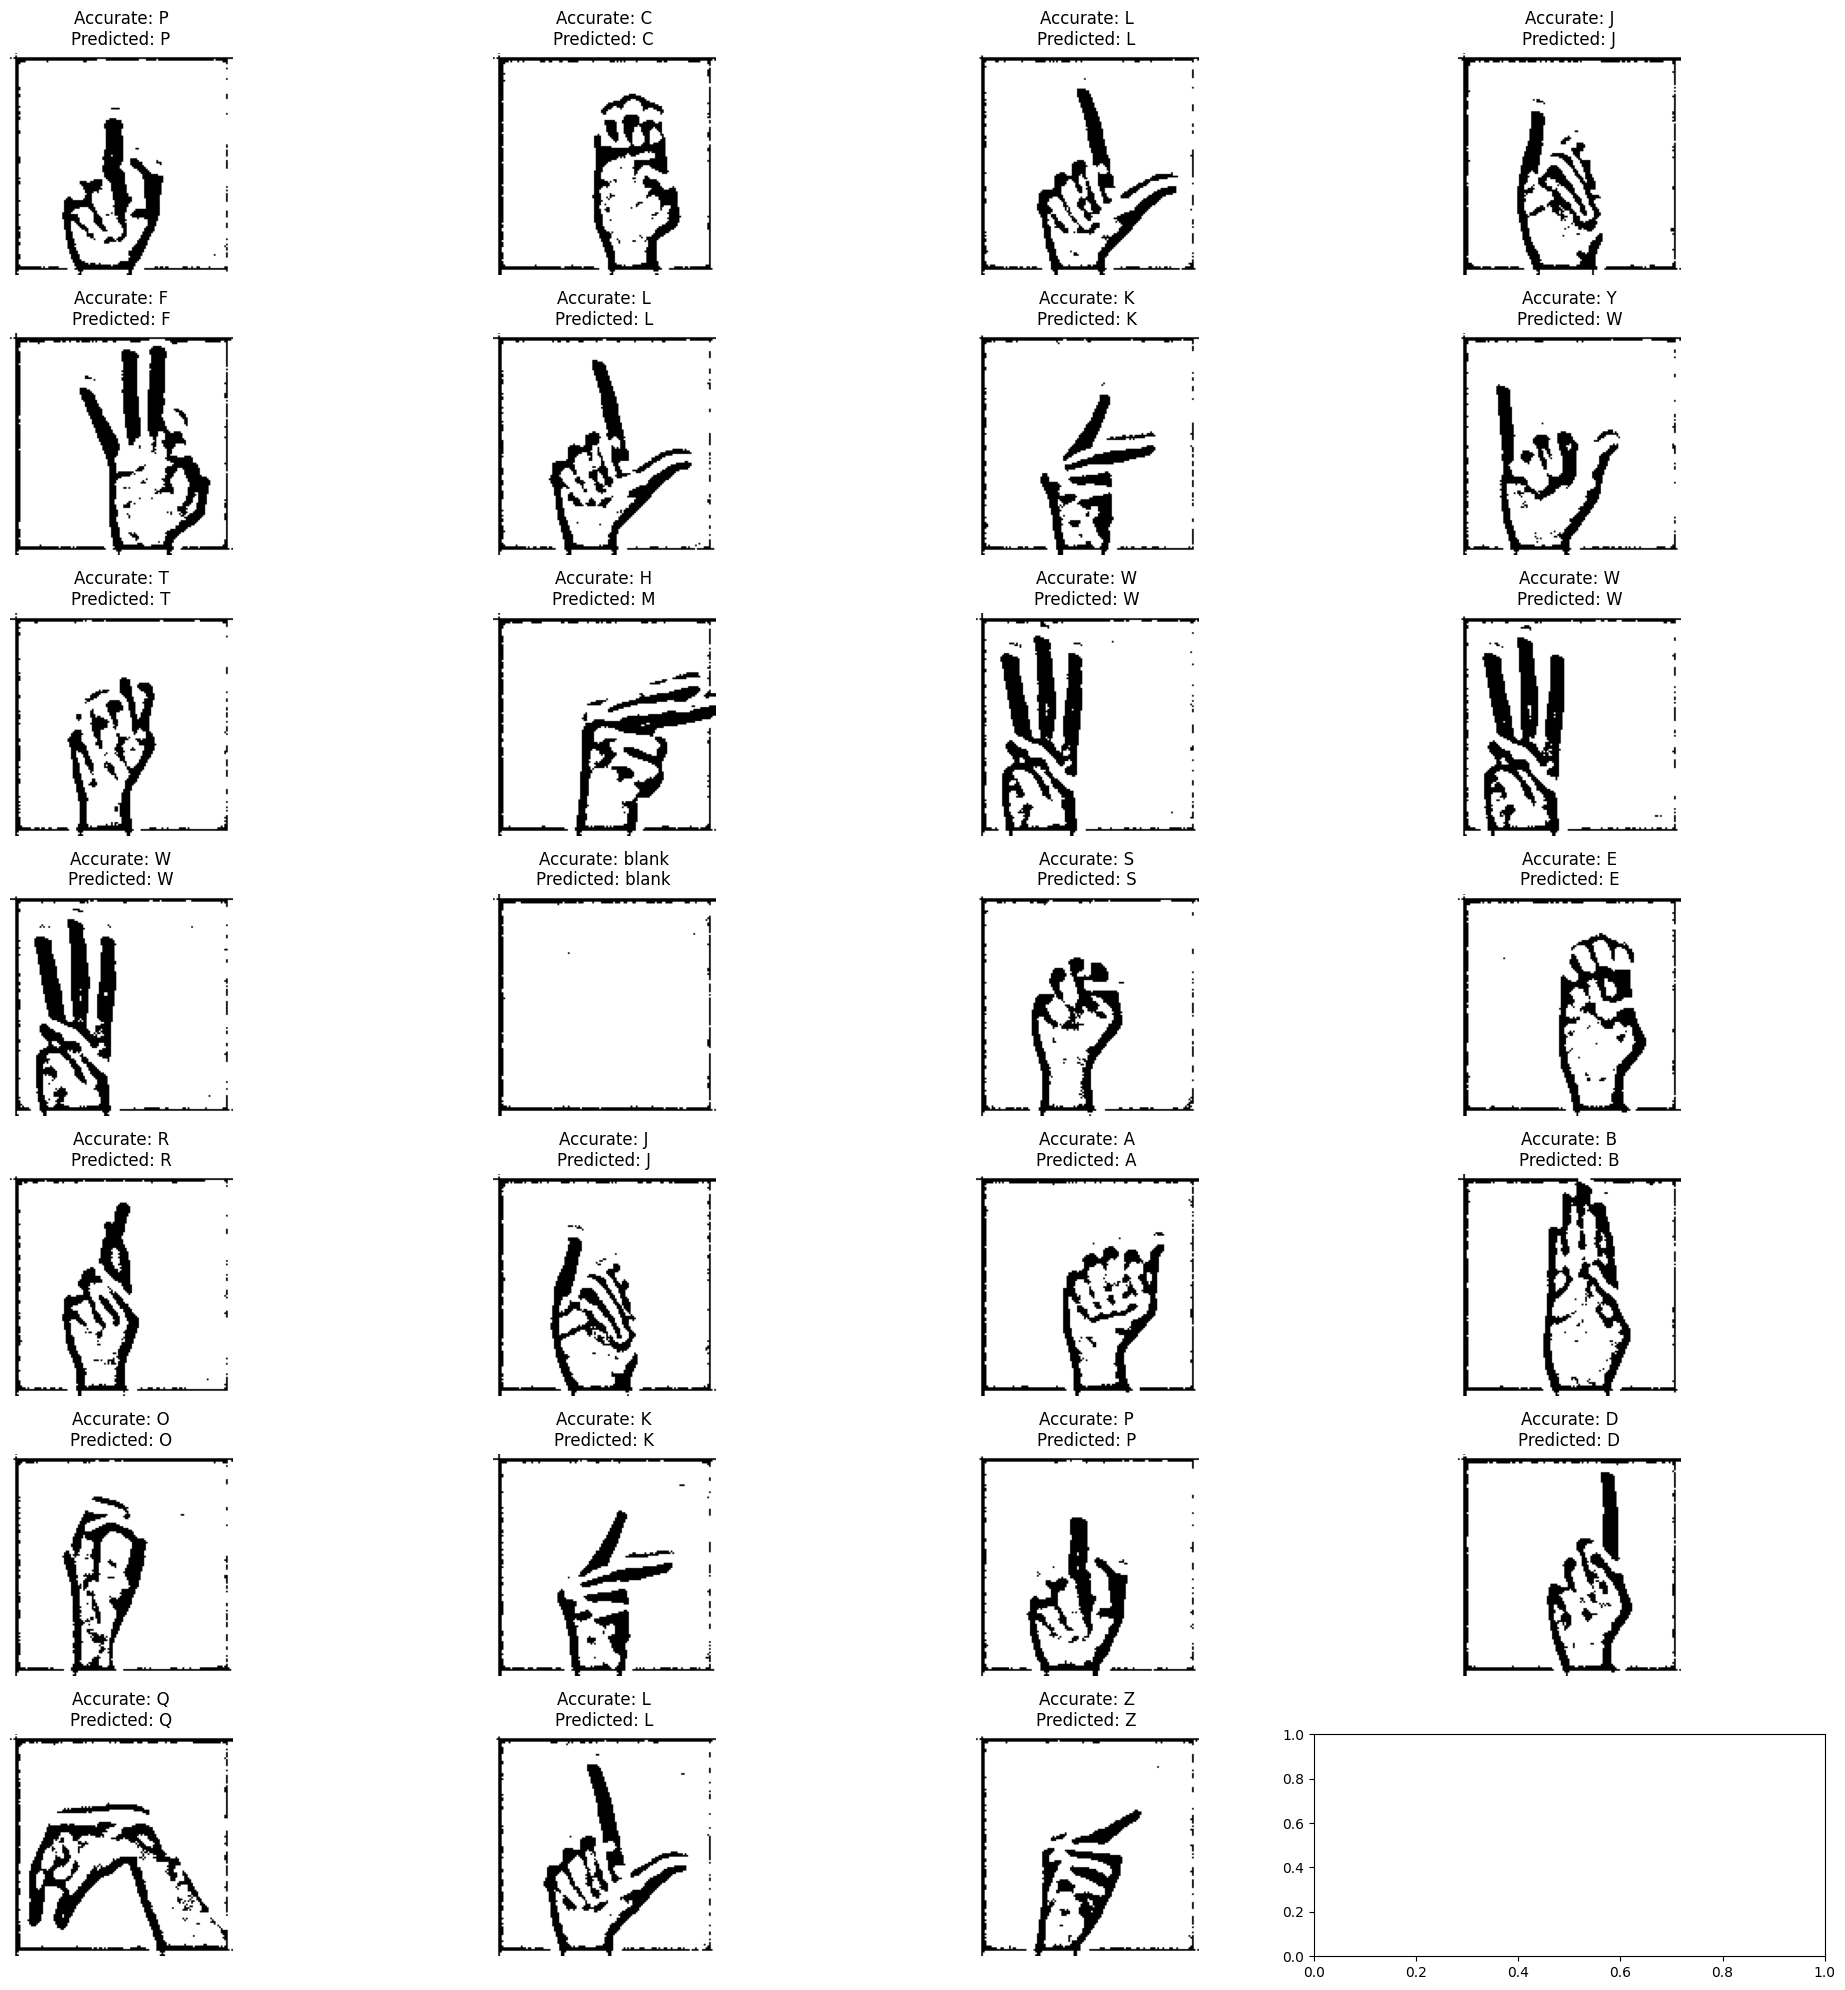

In [10]:
import numpy as np 

word_dict = list(train_batches.class_indices)
print('Actual labels')
accurate_labels = []
for i in labels:
    print(word_dict[np.argmax(i)], end='   ') 
    val = word_dict[np.argmax(i)] 
    accurate_labels.append(val) 


print()
predicted_labels=[]
print('predicted labels')
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end='   ')
    val1 = word_dict[np.argmax(i)] 
    predicted_labels.append(val1)

print() 
plotImages(imgs,accurate_labels,predicted_labels)



In [29]:
print(len(train_batches))

24


# Integrate it with the web cam

In [11]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
import os
import numpy as np
import cv2



print("library imported succesfully")

library imported succesfully


In [12]:
minValue = 70


def func(frame): 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
    blur = cv2.GaussianBlur(gray, (5, 5), 2)

    th3 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return res



In [13]:
cap = cv2.VideoCapture(0)

In [14]:
import cv2
import numpy as np

# Initialize Video Capture
cap = cv2.VideoCapture(0)



In [2]:
import numpy as np
import cv2
import keras
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [3]:
from tensorflow.keras.models import load_model
path = 'E:/MachineLearning/SignDetectionSystemUsingMachineLearning/best_model_dataflair13.h5' 


savedModel=load_model(path)

In [44]:
background = None
accumulated_weight = 0.5

In [25]:
ROI_top = 100
ROI_bottom = 300
ROI_right = 150
ROI_left = 350

In [26]:
def cal_accum_avg(frame, accumulated_weight):
    global background
    
    if background is None:
        background = frame.copy().astype("float")
        return None
    cv2.accumulateWeighted(frame, background, accumulated_weight)

In [27]:
def segment_hand(frame, threshold=25):
    global background
    
    diff = cv2.absdiff(background.astype("uint8"), frame)
    
    _ , thresholded = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)
    
     #Fetching contours in the frame (These contours can be of hand or any other object in foreground) …
    image, contours, hierarchy = cv2.findContours(thresholded.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
    # If length of contours list = 0, means we didn't get any 
    if len(contours) == 0:
        return None
    else:
        # The largest external contour should be the hand 
        hand_segment_max_cont = max(contours, key=cv2.contourArea)
        
        # Returning the hand segment(max contour) and the thresholded image of hand...
        return (thresholded, hand_segment_max_cont)

# Today i made the cropped portion which will be displayed as a frame on the video 

In [6]:
import cv2
import numpy as np
import cv2 
import os


word_dict = list(training_set.class_indices)
cap = cv2.VideoCapture(0)
minValue = 70
while(True): 
    ret, frame = cap.read() 
    if not ret: 
        break 

    # getting the height and width of an image
    width = int(frame.shape[1])
    height = int(frame.shape[0]) 
    dim = (width, height)
    
    # Create a blank mask
    mask = np.zeros_like(frame[:, :, 0])
    # width,height,channels = cv2.split(frame.copy()) 
    
    # Draw a rectangle on the mask
    cv2.rectangle(mask, (300, 40), (0, 400), (255, 255, 255), 3)

    # Copy the original frame
    result = frame.copy()

    # Extract the region covered by the mask
    cropped_region = result[10:220,20:230]

    # Convert cropped region to grayscale
    gray_cropped_region = cv2.cvtColor(cropped_region, cv2.COLOR_BGR2GRAY)
    

    blur = cv2.GaussianBlur(gray_cropped_region, (5, 5), 2)

    th3 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    color_image = cv2.cvtColor(res, cv2.COLOR_GRAY2BGR)
    # Replace the original cropped region with the gray one

    # this part will be used in the prediction 
    interrupt = cv2.waitKey(1)
    if interrupt & 0xFF == ord('b'):
        test_image = cv2.resize(res, (128,128))
        predicted_val = savedModel.predict(test_image.reshape(1 , 128, 128, 1))
        val1 = word_dict[np.argmax(predicted_val)]
        print(val1)
    
    # Show the Frame
    # pre = savedModel.predict(color_image)
    # print(pre)
    result[10:220,20:230] = color_image
    cv2.imshow('frame', result)

    if cv2.waitKey(1) == ord('q'):
        break

# Release Capture and destroy windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 217ms/step
blank
1/1 [==============================] - 0s 44ms/step
blank
1/1 [==============================] - 0s 46ms/step
blank
1/1 [==============================] - 0s 60ms/step
blank
1/1 [==============================] - 0s 42ms/step
blank
1/1 [==============================] - 0s 47ms/step
blank
1/1 [==============================] - 0s 48ms/step
blank
1/1 [==============================] - 0s 52ms/step
Y
1/1 [==============================] - 0s 48ms/step
A
1/1 [==============================] - 0s 45ms/step
A
1/1 [==============================] - 0s 46ms/step
Y
1/1 [==============================] - 0s 54ms/step
A
1/1 [==============================] - 0s 59ms/step
A
1/1 [==============================] - 0s 62ms/step
Y
1/1 [==============================] - 0s 44ms/step
A
1/1 [==============================] - 0s 52ms/step
Y
1/1 [==============================] - 0s 54ms/step
Y
1/1 [==============================] - 0s 45ms/step
Y

# Now i will used to make the prediction for the image

we will see it:  https://github.com/kumarvivek9088/SignLanguageDetectionUsingCNN/blob/main/realtimedetection.py


In [17]:
import cv2
import numpy as np

def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(128, 128, 3)
    return feature

# Initialize Video Capture
cap = cv2.VideoCapture(0)
minValue = 70
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # getting the height and width of an image
    width = frame.shape[1]
    height = frame.shape[0]

    # Create a blank mask
    mask = np.zeros_like(frame[:, :, 0])

    # Draw a rectangle on the mask
    
    cv2.rectangle(frame, (0, 40), (300, 300), (0, 165, 255), 1)
    result = frame.copy()
    # Copy the original frame
    cropframe = frame[40:300, 0:300]
    cropframe = cv2.cvtColor(cropframe, cv2.COLOR_BGR2GRAY)
    cropframe = cv2.resize(cropframe, (128, 128))
    cropframe = cv2.cvtColor(cropframe, cv2.COLOR_GRAY2BGR)
    pc = cropframe.copy()
    cropframe = extract_features(cropframe)
    result[40:168, 0:128] = pc
    cv2.rectangle(frame, (0, 0), (300, 40), (0, 165, 255), -1)

    cv2.imshow("output", frame)
    cv2.waitKey(1)

cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

In [20]:
import cv2
import numpy as np

# Initialize Video Capture
cap = cv2.VideoCapture(0)
minValue = 70
while(True): 
    ret, frame = cap.read() 
    if not ret: 
        break 

    # getting the height and width of an image
    width = int(frame.shape[1])
    height = int(frame.shape[0]) 
    dim = (width, height)
    
    # Create a blank mask
    mask = np.zeros_like(frame[:, :, 0])
    # width,height,channels = cv2.split(frame.copy()) 
    
    # Draw a rectangle on the mask
    cv2.rectangle(mask, (0, 40), (300, 400), (255, 255, 255), 3)

    # Copy the original frame
    result = frame.copy()

    # Extract the region covered by the mask
    cropped_region = result[0:40, 300:400]

    # Convert cropped region to grayscale
    gray_cropped_region = cv2.cvtColor(cropped_region, cv2.COLOR_BGR2GRAY)
    

    blur = cv2.GaussianBlur(gray_cropped_region, (5, 5), 2)

    th3 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    color_image = cv2.cvtColor(res, cv2.COLOR_GRAY2BGR)
    # Replace the original cropped region with the gray one
    result[0:40, 300:400] = color_image
    # print(color_image.shape[2])
    # print(color_image.shape[1])
    # print(color_image.shape[0])
    # Show the Frame
    # pre = savedModel.predict(color_image)
    # print(pre)
    cv2.imshow('frame', result)

    if cv2.waitKey(1) == ord('q'):
        break

# Release Capture and destroy windows
cap.release()
cv2.destroyAllWindows()


# For sahil

In [38]:
import cv2
import numpy as np

# Initialize Video Capture
cap = cv2.VideoCapture(0)
minValue = 70
while(True): 
    ret, frame = cap.read() 
    if not ret: 
        break 

    # getting the height and width of an image
    width = int(frame.shape[1])
    height = int(frame.shape[0]) 
    dim = (width, height)
    
    # Create a blank mask
    mask = np.zeros_like(frame[:, :, 0])
    # width,height,channels = cv2.split(frame.copy()) 
    
    # Draw a rectangle on the mask
    cv2.rectangle(mask, (300, 40), (0, 400), (255, 255, 255), 3)

    # Copy the original frame
    result = frame.copy()

    # Extract the region covered by the mask
    cropped_region = result[10:300,20:450]

    # Convert cropped region to grayscale
    gray_cropped_region = cv2.cvtColor(cropped_region, cv2.COLOR_BGR2GRAY)
    

    blur = cv2.GaussianBlur(gray_cropped_region, (5, 5), 2)

    th3 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    color_image = cv2.cvtColor(res, cv2.COLOR_GRAY2BGR)
    # Replace the original cropped region with the gray one
    result[10:300,20:450]= color_image
    # print(color_image.shape[2])
    # print(color_image.shape[1]
    # print(color_image.shape[0])
    # Show the Frame
    # pre = savedModel.predict(color_image)
    # print(pre)
    cv2.imshow('frame', result)

    if cv2.waitKey(1) == ord('q'):
        break

# Release Capture and destroy windows
cap.release()
cv2.destroyAllWindows()
